In [16]:
!pip install kagglehub[pandas-datasets]
!pip install wolta
!pip install wordcloud
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 35.4 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
fake_file_path = "Fake.csv"

# Load the latest version
df_false = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "clmentbisaillon/fake-and-real-news-dataset",
  fake_file_path,
)

true_file_path = "True.csv"

df_true = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "clmentbisaillon/fake-and-real-news-dataset",
  true_file_path,
)

print("First 5 fake records:", fake_data.head())
print("First 5 true records:", true_data.head())

/tmp/ipykernel_403/3613094738.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_false = kagglehub.load_dataset(
/tmp/ipykernel_403/3613094738.py:16: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_true = kagglehub.load_dataset(


First 5 fake records:                                                title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
First 5 true records:                                                title  \
0  As U.S. budget fight looms, Republica

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

 # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [10]:
import numpy as np 
import pandas as pd

In [7]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
df_false.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [11]:
df1_copy = df_true.copy()
df2_copy = df_false.copy()

df1_copy["label"] = True
df2_copy["label"] = False

df= pd.concat([df1_copy, df2_copy], ignore_index=True)

print(df.info())  
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.4+ MB
None
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The sp

In [12]:
unique_subjects = df['subject'].unique()
print(unique_subjects)

['politicsNews' 'worldnews' 'News' 'politics' 'Government News'
 'left-news' 'US_News' 'Middle-east']


### Word Cloud

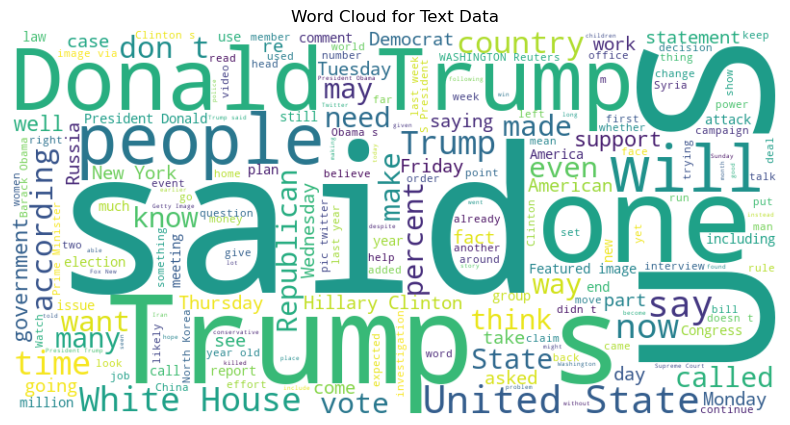

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_data, title="Word Cloud"):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(df['text'], "Word Cloud for Text Data")

### Word Frequency

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


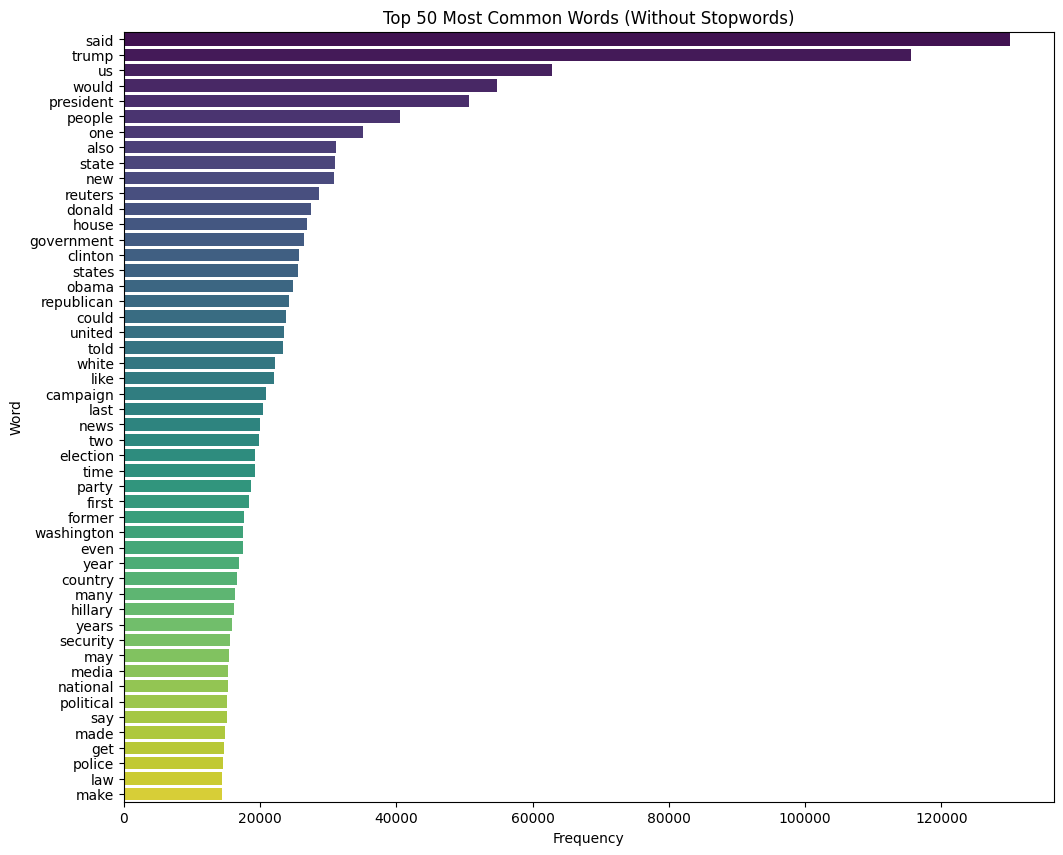

In [16]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Clean text：remove punctuation, convert to lower case and remove stop word"""
    words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return [word for word in words if word not in stop_words]

def plot_word_frequency(text_data, top_n=20):
 
    words = []
    for text in text_data:
        words.extend(clean_text(text))  

    word_freq = Counter(words)
    common_words = word_freq.most_common(top_n)

    df_freq = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
    
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Frequency', y='Word', data=df_freq, palette='viridis')
    plt.title(f"Top {top_n} Most Common Words (Without Stopwords)")
    plt.show()

plot_word_frequency(df['text'],top_n = 50)

### Topic Modeling - LDA

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def topic_modeling(text_data, num_topics=5):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    text_tfidf = vectorizer.fit_transform(text_data)
    
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_topics = lda_model.fit_transform(text_tfidf)
    
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx + 1}: ", " ".join([feature_names[i] for i in topic.argsort()[-10:]]))

topic_modeling(df['text'])

Topic 1:  clinton judge government law federal police department state court said
Topic 2:  donald obama president clinton like hillary twitter just people trump
Topic 3:  year britain reuters percent european minister eu government party said
Topic 4:  campaign republicans clinton tax president senate house republican said trump
Topic 5:  syria reuters nuclear military united iran north china korea said


### Radar Chart for Subject Analysis

In [ ]:
import numpy as np

def plot_subject_radar(df):
    subjects = df['subject'].value_counts()
    labels = subjects.index
    values = subjects.values

    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title("Article Subject Distribution")
    plt.show()

plot_subject_radar(df)

Time Series Analysis

------------------------------------
## Sentimental Analysis

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])

df["sentiment"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")

print(df[["title", "sentiment_score"]].head(10))

                                               title  sentiment_score
0  As U.S. budget fight looms, Republicans flip t...           0.9847
1  U.S. military to accept transgender recruits o...          -0.0289
2  Senior U.S. Republican senator: 'Let Mr. Muell...          -0.6808
3  FBI Russia probe helped by Australian diplomat...          -0.2201
4  Trump wants Postal Service to charge 'much mor...           0.6836
5  White House, Congress prepare for talks on spe...           0.9794
6  Trump says Russia probe will be fair, but time...           0.9814
7  Factbox: Trump on Twitter (Dec 29) - Approval ...           0.7254
8         Trump on Twitter (Dec 28) - Global Warming           0.8201
9  Alabama official to certify Senator-elect Jone...           0.4767


In [ ]:
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer

nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()

def dependency_sentiment(text):
    doc = nlp(text)
    sentiment_score = 0
    for token in doc:
        if token.dep_ in ["amod", "advmod"]:  
            word_sentiment = sia.polarity_scores(token.text)["compound"]
            sentiment_score += word_sentiment
    return sentiment_score

df["dep_sentiment_score"] = df["text"].apply(dependency_sentiment)